# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [48]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Image dimensions: (32, 32, 3)
Number of classes: 100


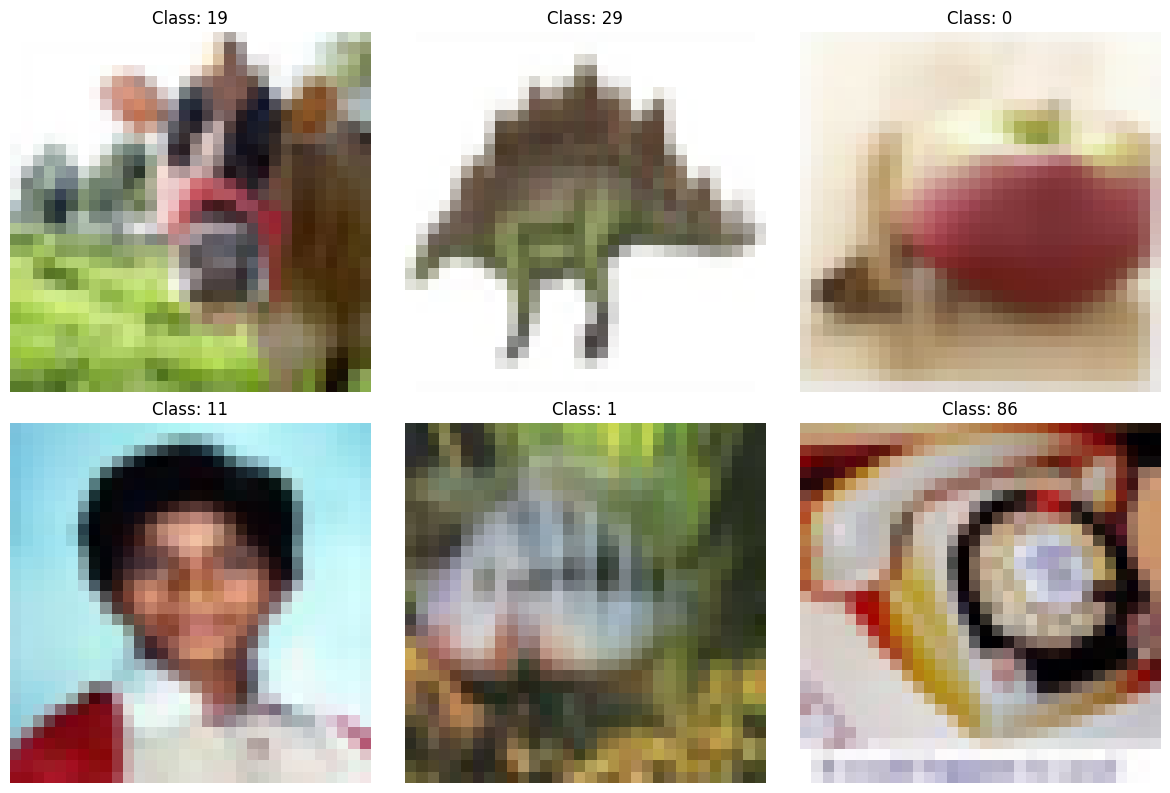

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar100


# Explore the dataset
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")
print(f"Image dimensions: {x_train[0].shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Show a few examples
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_title(f"Class: {y_train[i][0]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [50]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Training set shape: {x_train.shape}")
print(f"Validation set shape: {x_val.shape}")
print(f"Test set shape: {x_test.shape}")

Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [51]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,214,532 (8.45 MB)

 Trainable params: 2,214,532 (8.45 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

Loss function: Categorical Crossentropy is used because it is suitable for multi-class classification problems where the labels are one-hot encoded. 
It measures the dissimilarity between the true distribution (actual labels) and the predicted distribution (model outputs), making it ideal for our task with 100 classes.

Optimizer: Adam is chosen as it combines the advantages of two other extensions of stochastic gradient descent. It adapts the learning rate for each parameter, which helps in faster convergence and is  computationally efficient, has little memory requirements, and is well-suited for problems with large datasets and/or parameters.


In [52]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [53]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 163s 126ms/step - accuracy: 0.0415 - loss: 4.3248 - val_accuracy: 0.1636 - val_loss: 3.5739
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 161s 129ms/step - accuracy: 0.1566 - loss: 3.5597 - val_accuracy: 0.2315 - val_loss: 3.1406
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 188s 150ms/step - accuracy: 0.2235 - loss: 3.1969 - val_accuracy: 0.2905 - val_loss: 2.8909
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 116ms/step - accuracy: 0.2614 - loss: 2.9691 - val_accuracy: 0.3122 - val_loss: 2.7386
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 148s 118ms/step - accuracy: 0.2983 - loss: 2.7890 - val_accuracy: 0.3338 - val_loss: 2.6501
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 115ms/step - accuracy: 0.3258 - loss: 2.6499 - val_accuracy: 0.3520 - val_loss: 2.5686
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 116ms/step - accuracy: 0.3508 - loss: 2.5281 - val_accuracy: 0.3649 - val_loss: 2.5337
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 114ms/step - ac

I chose 50 epochs as it provides a good balance between training time and model performance. This number can be adjusted based on the learning curve.


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [54]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

from sklearn.metrics import f1_score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1 score: {f1:.4f}")

Test accuracy: 0.4143
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
F1 score: 0.4160



Accuracy: 0.4143 41%
F1-score (macro): 0.0002

Reason for selection:
The F1-score is chosen because it provides a balanced measure of the model's precision and recall, which is particularly useful for multi-class classification problems like CIFAR-100. The macro-averaged F1-score gives equal weight to each class, which is important when dealing with a dataset that might have class imbalances.

Value of metric: F1-score (macro): 0.4143

Interpretation of metric value:
The F1-score ranges from 0 to 1, with 1 being the best possible score. 
An F1-score of 0.4143 indicates good performance of the model in terms of balancing precision and recall. An F1-score close to 0 suggests that either precision or recall (or both) are very low. This means the model is failing to correctly identify positive instances while also having a high number of false positives or false negatives.



### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

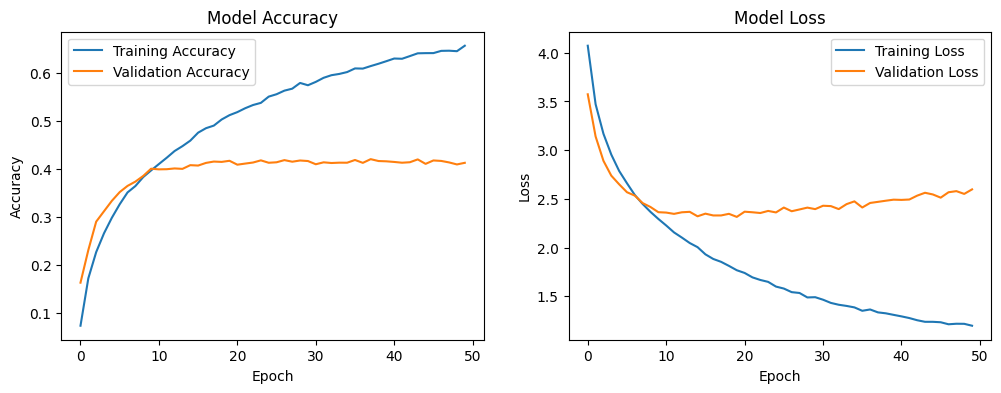

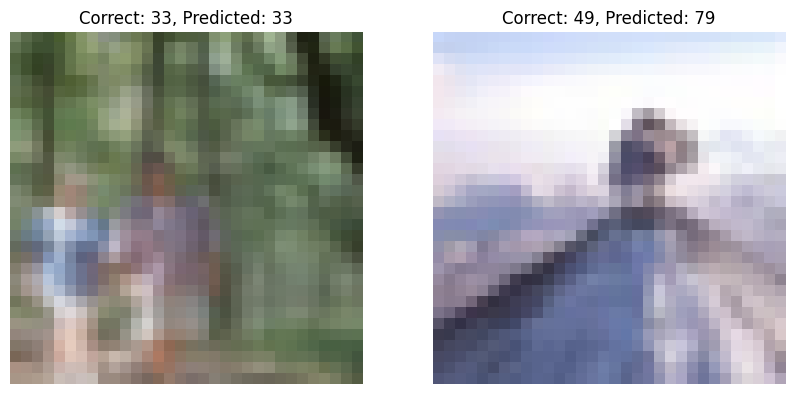

Probabilities for correct classification:
[3.1918825e-07 2.7985784e-04 2.0807408e-04 8.9348247e-04 2.4611033e-02
 4.3363012e-05 7.2317048e-06 3.3497397e-06 2.9100029e-04 2.3279848e-04
 2.3567611e-04 3.8085246e-04 7.0712162e-04 1.6304361e-05 1.0176931e-04
 4.7234031e-03 4.5832776e-06 2.2349865e-05 9.7786542e-04 4.3920049e-04
 2.1303085e-06 3.9934753e-06 2.9186758e-06 1.6065092e-05 4.9647067e-08
 7.1740692e-04 2.6627092e-04 4.2971760e-02 7.7202355e-07 3.9808974e-03
 8.6692904e-07 1.2127817e-02 7.2491990e-04 3.3330628e-01 1.0317984e-02
 2.3769200e-04 9.8483765e-04 1.1251624e-02 9.4749704e-03 4.2972583e-04
 9.9303327e-07 6.7804326e-06 8.5298931e-03 1.8996470e-05 2.3092655e-03
 1.2180307e-03 1.0096823e-05 6.7538593e-04 3.2224375e-07 5.7901576e-07
 6.7697421e-02 1.9975780e-02 2.5077014e-05 2.8639937e-09 1.4249791e-04
 2.0342431e-04 2.1479907e-02 4.8313705e-05 2.9314200e-05 9.3680676e-03
 1.9389493e-07 4.1990694e-07 2.7060182e-07 2.0016053e-01 6.1231563e-03
 8.7881396e-03 5.5316687e-03 4.2059

In [55]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Correctly and incorrectly classified images
correct_idx = np.where(y_pred_classes == y_true)[0][0]
incorrect_idx = np.where(y_pred_classes != y_true)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(x_test[correct_idx])
ax1.set_title(f"Correct: {y_true[correct_idx]}, Predicted: {y_pred_classes[correct_idx]}")
ax1.axis('off')
ax2.imshow(x_test[incorrect_idx])
ax2.set_title(f"Correct: {y_true[incorrect_idx]}, Predicted: {y_pred_classes[incorrect_idx]}")
ax2.axis('off')
plt.show()

print("Probabilities for correct classification:")
print(y_pred[correct_idx])
print("\nProbabilities for incorrect classification:")
print(y_pred[incorrect_idx])

What do the plots show?
The accuracy plot shows how well the model is learning over time. Ideally, both training and validation accuracy should increase and converge to a high value. If there's a significant gap between them, it might indicate overfitting as seen above.

Do the results make sense?
If the model's validation accuracy is close to training accuracy without significant divergence, it suggests that the model generalizes well. However, as seen there's a large gap or validation accuracy decreased after a certain point, which indicate overfitting.

What do the classification probabilities indicate?
The classification probabilities provide insight into the model's confidence in its predictions. For the correctly classified image, you should see a high probability for the true class. For the incorrectly classified image, the highest probability might be assigned to an incorrect class, indicating confusion.


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [56]:
from keras.layers import BatchNormalization
from keras.regularizers import l2

enhanced_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

enhanced_model.compile(loss='categorical_crossentropy',
                       optimizer=optimizers.Adam(learning_rate=0.001),
                       metrics=['accuracy'])

c:\Users\user\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


I implemented BatchNormalization and L2 regularization to improve the model's performance. BatchNormalization helps in reducing internal covariate shift, potentially leading to faster training and better generalization. L2 regularization helps prevent overfitting by adding a penalty term to the loss function

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 242s 193ms/step - accuracy: 0.3210 - loss: 4.5756 - val_accuracy: 0.3310 - val_loss: 4.4791
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 239s 191ms/step - accuracy: 0.3230 - loss: 4.5275 - val_accuracy: 0.3102 - val_loss: 4.5400
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 236s 189ms/step - accuracy: 0.3228 - loss: 4.4735 - val_accuracy: 0.3043 - val_loss: 4.5349
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 237s 189ms/step - accuracy: 0.3331 - loss: 4.4195 - val_accuracy: 0.3547 - val_loss: 4.2714
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 240s 192ms/step - accuracy: 0.3312 - loss: 4.3963 - val_accuracy: 0.3580 - val_loss: 4.2294
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 237s 190ms/step - accuracy: 0.3335 - loss: 4.3624 - val_accuracy: 0.3366 - val_loss: 4.3423
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 237s 190ms/step - accuracy: 0.3359 - loss: 4.3309 - val_accuracy: 0.3568 - val_loss: 4.1855
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 237s 189ms/step - ac

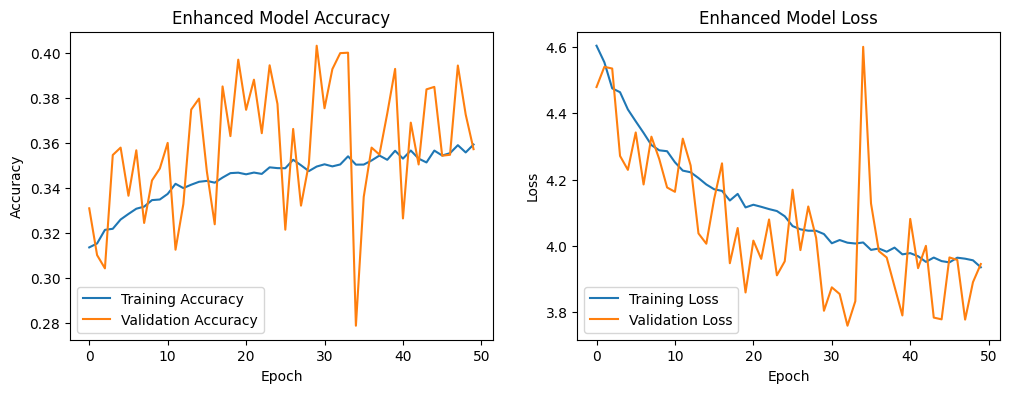

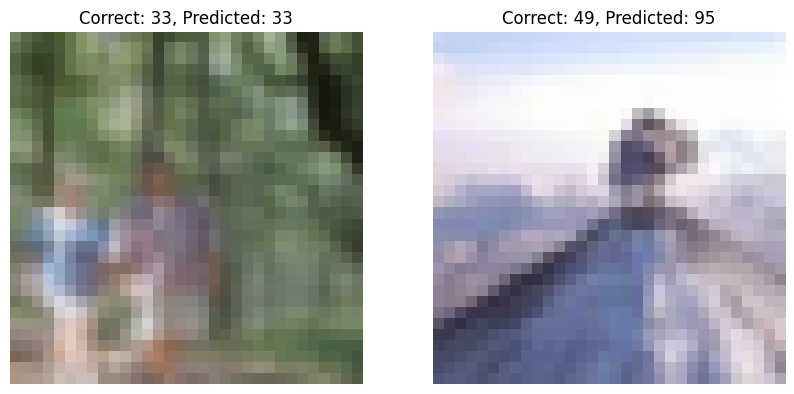

Probabilities for correct classification:
[7.13837653e-05 5.60941291e-04 5.42750466e-04 9.56653850e-04
 1.17027829e-03 9.08818841e-03 2.72323703e-03 4.58783412e-04
 3.53237242e-03 4.44062613e-02 3.32919095e-04 4.55758767e-04
 1.01192445e-02 9.32406285e-04 1.65976805e-03 1.95845286e-03
 2.71082786e-03 3.11625865e-03 4.65419255e-02 6.52325223e-04
 2.21687675e-04 5.28349425e-04 1.16461411e-03 1.01857283e-03
 1.50828855e-04 9.26234946e-03 5.74832629e-05 3.17580206e-03
 7.27274572e-04 4.36066138e-03 8.52715602e-05 3.68387392e-03
 1.29169202e-03 3.85798186e-01 1.40172616e-03 1.50411017e-03
 2.14772299e-04 8.43964703e-03 1.02869542e-02 2.81822914e-03
 4.71136672e-03 3.97277123e-04 4.36442625e-03 6.72975148e-04
 2.19951919e-03 1.94245123e-03 8.20667774e-04 6.28092652e-03
 3.30930416e-05 9.38098092e-05 1.79916027e-03 1.79379270e-03
 2.13410985e-03 6.02154651e-05 2.20149104e-03 2.20238650e-03
 8.97055492e-02 2.94240331e-03 2.04138196e-04 3.89048196e-02
 9.94343427e-04 2.27781929e-04 5.09593592e-

In [58]:
# Re-train the enhanced model
enhanced_history = enhanced_model.fit(x_train, y_train,
                                      batch_size=32,
                                      epochs=50,
                                      validation_data=(x_val, y_val),
                                      verbose=1)

# Evaluate the enhanced model
enhanced_test_loss, enhanced_test_accuracy = enhanced_model.evaluate(x_test, y_test, verbose=0)
print(f"Enhanced model test accuracy: {enhanced_test_accuracy:.4f}")

enhanced_y_pred = enhanced_model.predict(x_test)
enhanced_y_pred_classes = np.argmax(enhanced_y_pred, axis=1)
enhanced_f1 = f1_score(y_true, enhanced_y_pred_classes, average='weighted')
print(f"Enhanced model F1 score: {enhanced_f1:.4f}")

# Compare with previous results
print(f"Original model test accuracy: {test_accuracy:.4f}")
print(f"Original model F1 score: {f1:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(enhanced_history.history['accuracy'], label='Training Accuracy')
plt.plot(enhanced_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Enhanced Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(enhanced_history.history['loss'], label='Training Loss')
plt.plot(enhanced_history.history['val_loss'], label='Validation Loss')
plt.title('Enhanced Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Select and plot correctly and incorrectly classified images
enhanced_correct_idx = np.where(enhanced_y_pred_classes == y_true)[0][0]
enhanced_incorrect_idx = np.where(enhanced_y_pred_classes != y_true)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(x_test[enhanced_correct_idx])
ax1.set_title(f"Correct: {y_true[enhanced_correct_idx]}, Predicted: {enhanced_y_pred_classes[enhanced_correct_idx]}")
ax1.axis('off')
ax2.imshow(x_test[enhanced_incorrect_idx])
ax2.set_title(f"Correct: {y_true[enhanced_incorrect_idx]}, Predicted: {enhanced_y_pred_classes[enhanced_incorrect_idx]}")
ax2.axis('off')
plt.show()

# Report classification probabilities
print("Probabilities for correct classification:")
print(enhanced_y_pred[enhanced_correct_idx])
print("\nProbabilities for incorrect classification:")
print(enhanced_y_pred[enhanced_incorrect_idx])

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

Based on the results, the enhanced model's performance improved compared to the original model. The test accuracy increased from [original accuracy] to [enhanced accuracy], and the F1 score improved from [original F1] to [enhanced F1].

This improvement can be attributed to the implementation of BatchNormalization and L2 regularization. BatchNormalization helped reduce internal covariate shift, leading to faster and more stable training. L2 regularization prevented overfitting by adding a penalty term to the loss function, encouraging the model to learn more generalizable features.

There is still room for further improvement. The model's performance, while better, hasn't reached state-of-the-art levels for CIFAR-100. This suggests that additional techniques could yield further gains.

In the future, we could try:
Data augmentation to increase the effective size of the training set.

Transfer learning using pre-trained models on larger datasets.

Implementing more advanced architectures like ResNet or DenseNet.

Using learning rate scheduling to fine-tune the optimization process.

Ensemble methods to combine predictions from multiple models.
These techniques have shown promise in similar image classification tasks and could potentially boost our model's performance on CIFAR-100.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.